Group 4
1. Ansuman Pujari 		- 24MAS10013
2. Jayesh Zope 			- 24MAS10015
3. Mallari Madhu 			- 24MAS10026
4. Vaibhav Mandavkar 		- 24MAS10038
5. Harshwardhan Yadav 	- 24MAS10050

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/creditcard_1.csv')

In [3]:
from sklearn.metrics import (
accuracy_score,
precision_score,
recall_score,
f1_score,
log_loss,
roc_auc_score,
roc_curve,
confusion_matrix,
ConfusionMatrixDisplay,
classification_report,
roc_curve
)
from sklearn.preprocessing import label_binarize

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].unique()

array([0, 1])

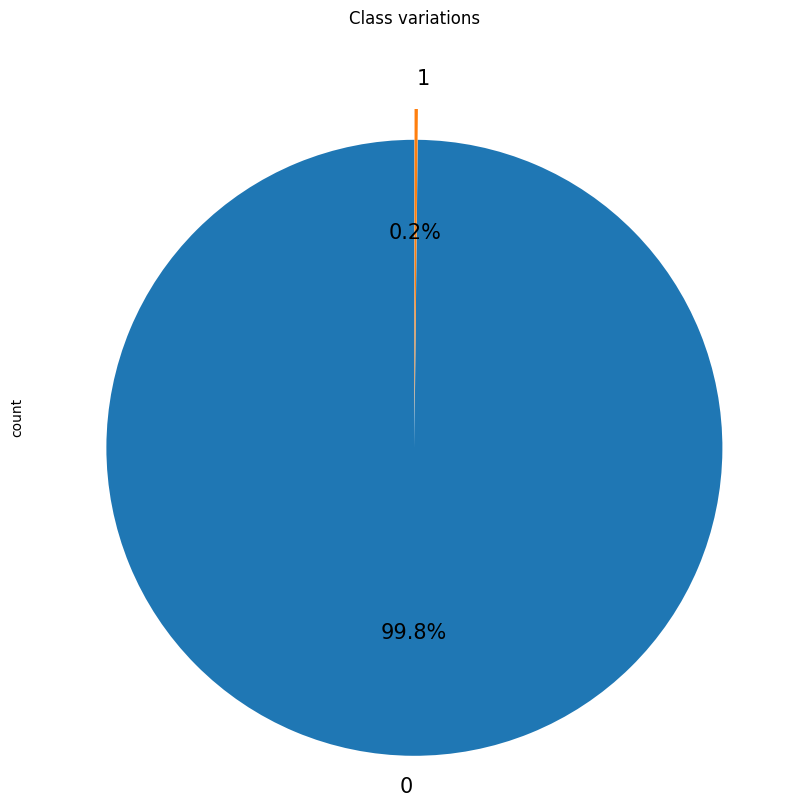

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [8]:
data = df
plt.figure(figsize = (10,10))
explode = tuple([0.1] + [0]*(len(data['Class'].unique())-1))
data['Class'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%', fontsize=15)
plt.title('Class variations')
plt.show()
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

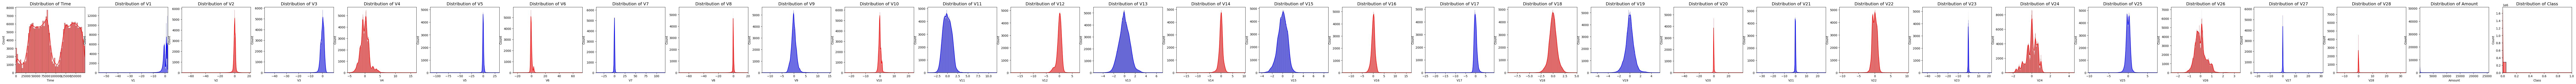

In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)
fig, ax = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=ax[i], kde=True, color='r' if i % 2 == 0 else 'b')
    ax[i].set_title(f'Distribution of {col}', fontsize=14)
    ax[i].set_xlim([df[col].min(), df[col].max()])

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [15]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [20]:
#using StratifiedKFold sampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold


X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [21]:
#random under sampling
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
75210,-0.058269,-0.337621,1.401989,-0.700695,0.199669,-0.940566,-0.877485,-0.295760,-0.813697,0.133049,...,-0.021859,-0.120363,-0.626249,0.038700,-0.584675,0.232113,-0.439089,-0.010717,0.000736,0
151103,0.164326,0.116695,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,...,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,1
270428,-0.156781,0.932600,-0.252152,1.063843,-1.158651,-0.800324,1.123482,-0.084661,0.442735,0.548017,...,-0.028585,-0.300008,-0.944637,0.043764,-0.412366,-0.313421,0.154859,0.088898,-0.013730,0
151196,7.678055,0.120537,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1
151009,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1


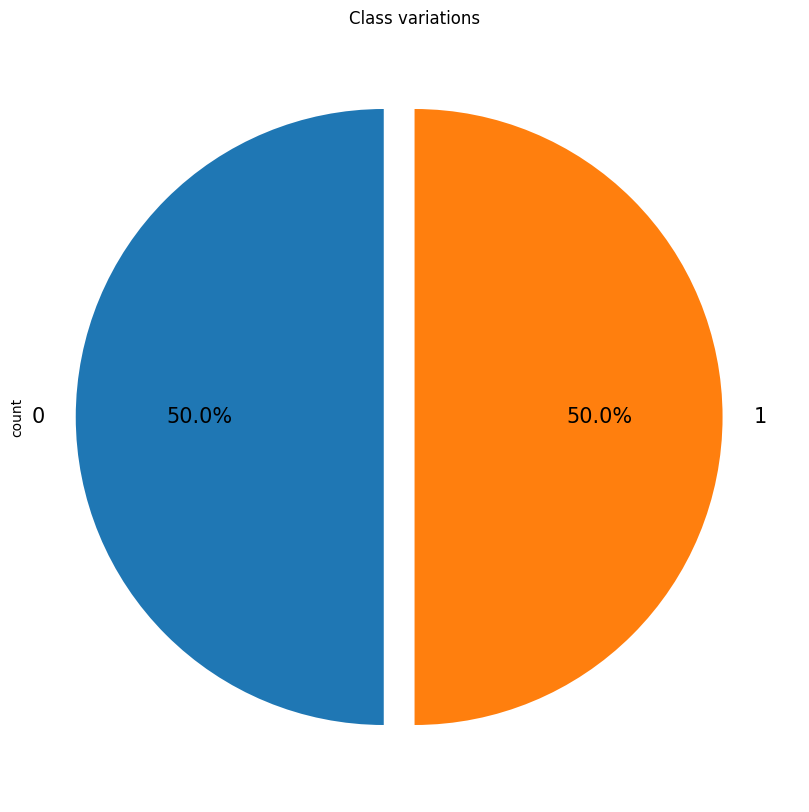

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [23]:
data = new_df
plt.figure(figsize = (10,10))
explode = tuple([0.1] + [0]*(len(data['Class'].unique())-1))
data['Class'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%', fontsize=15)
plt.title('Class variations')
plt.show()
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

In [27]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
75210,-0.058269,-0.337621,1.401989,-0.700695,0.199669,-0.940566,-0.877485,-0.295760,-0.813697,0.133049,...,-0.021859,-0.120363,-0.626249,0.038700,-0.584675,0.232113,-0.439089,-0.010717,0.000736,0
151103,0.164326,0.116695,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,...,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,1
270428,-0.156781,0.932600,-0.252152,1.063843,-1.158651,-0.800324,1.123482,-0.084661,0.442735,0.548017,...,-0.028585,-0.300008,-0.944637,0.043764,-0.412366,-0.313421,0.154859,0.088898,-0.013730,0
151196,7.678055,0.120537,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,...,0.944915,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1
151009,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1


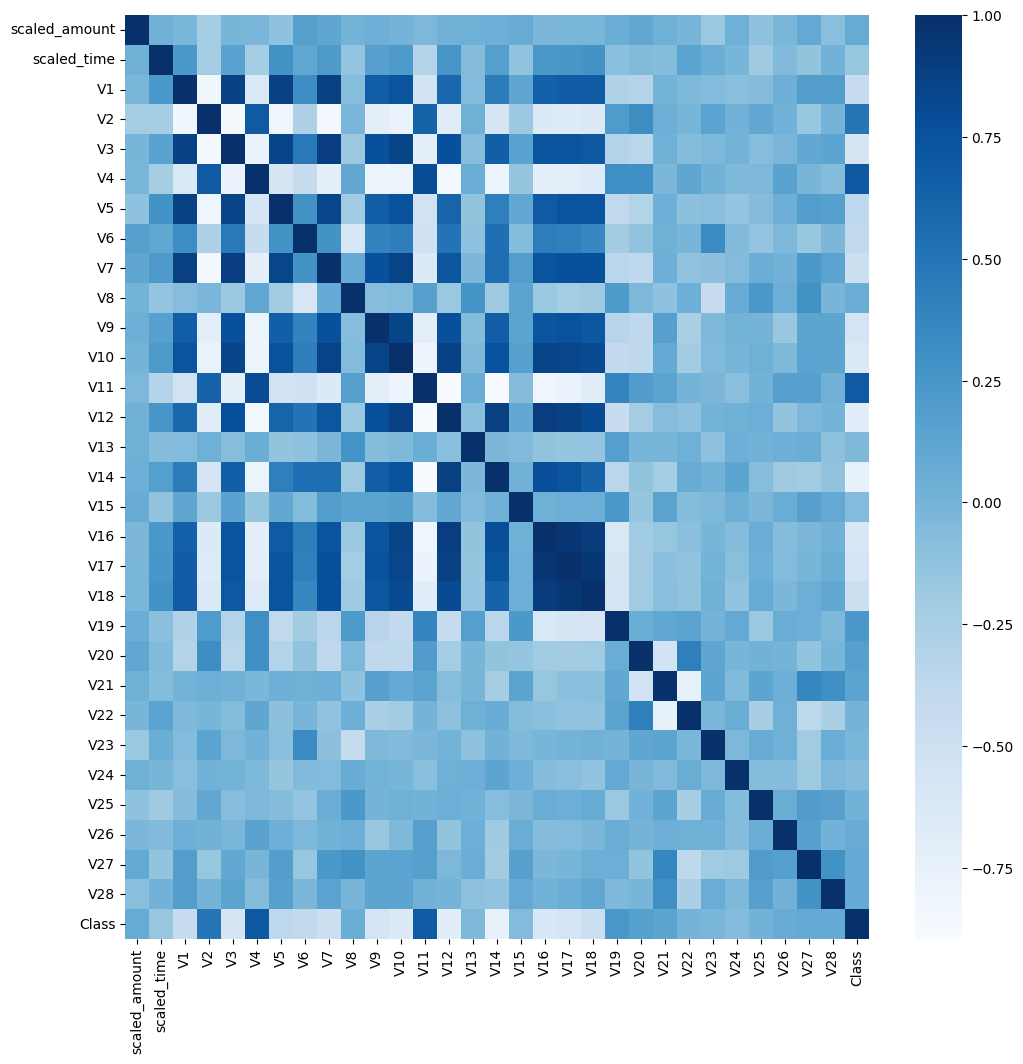

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='Blues')
plt.show()

In [43]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
results = {
    'Model': [],
    'Training Accuracy': [],
    'Validation Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Training Loss': [],
    'Validation Loss': [],
    'AUC-ROC': []
}
def display_results(model,model_name):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_test)[:, 1]

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)

    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_test, y_val_proba)

    print("Classification Report:")
    print(classification_report(y_test, y_val_pred))

    f1 = f1_score(y_test, y_val_pred)
    precision = precision_score(y_test, y_val_pred)
    recall = recall_score(y_test, y_val_pred)

    auc_roc = roc_auc_score(y_test, y_val_proba)

    results['Model'].append(model_name)
    results['Training Accuracy'].append(train_accuracy)
    results['Validation Accuracy'].append(val_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['Training Loss'].append(train_loss)
    results['Validation Loss'].append(val_loss)
    results['AUC-ROC'].append(auc_roc)


    conf_matrix = confusion_matrix(y_test, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_val_proba)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.4f}")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

# Knn

n_neighbors: 1 - Accuracy: 0.9543
n_neighbors: 3 - Accuracy: 0.9594
n_neighbors: 5 - Accuracy: 0.9594
n_neighbors: 7 - Accuracy: 0.9543
n_neighbors: 9 - Accuracy: 0.9594
n_neighbors: 11 - Accuracy: 0.9543
n_neighbors: 13 - Accuracy: 0.9543
n_neighbors: 15 - Accuracy: 0.9543
n_neighbors: 17 - Accuracy: 0.9543
n_neighbors: 19 - Accuracy: 0.9543
n_neighbors: 21 - Accuracy: 0.9492
n_neighbors: 23 - Accuracy: 0.9543
n_neighbors: 25 - Accuracy: 0.9492
n_neighbors: 27 - Accuracy: 0.9492
n_neighbors: 29 - Accuracy: 0.9442
n_neighbors: 31 - Accuracy: 0.9492
n_neighbors: 33 - Accuracy: 0.9492
n_neighbors: 35 - Accuracy: 0.9492
n_neighbors: 37 - Accuracy: 0.9442
n_neighbors: 39 - Accuracy: 0.9391
n_neighbors: 41 - Accuracy: 0.9442
n_neighbors: 43 - Accuracy: 0.9391
n_neighbors: 45 - Accuracy: 0.9391
n_neighbors: 47 - Accuracy: 0.9391
n_neighbors: 49 - Accuracy: 0.9391


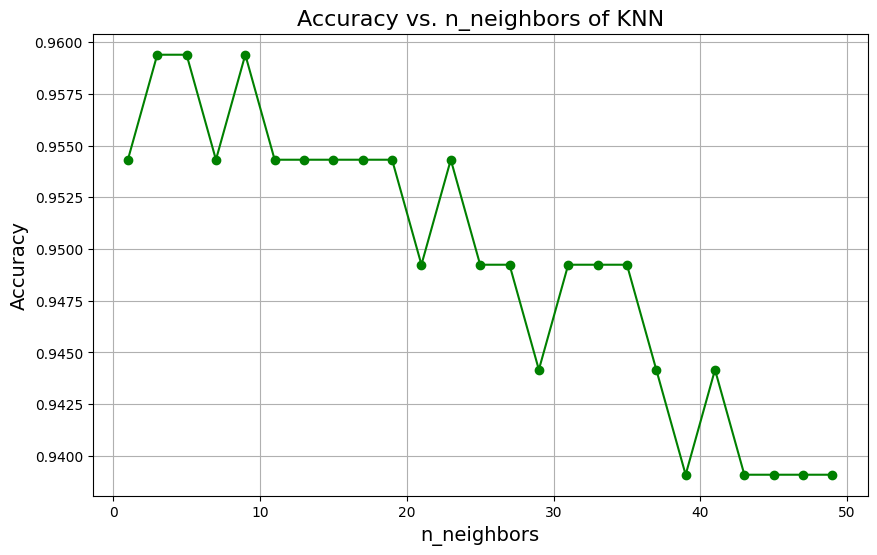

In [247]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors_range = range(1, 50, 2)
accuracies = []

for n_neighbors in n_neighbors_range:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"n_neighbors: {n_neighbors} - Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, accuracies, marker='o', color='g')
plt.title('Accuracy vs. n_neighbors of KNN', fontsize=16)
plt.xlabel('n_neighbors', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [248]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9593908629441624


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.99      0.94      0.96       110

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



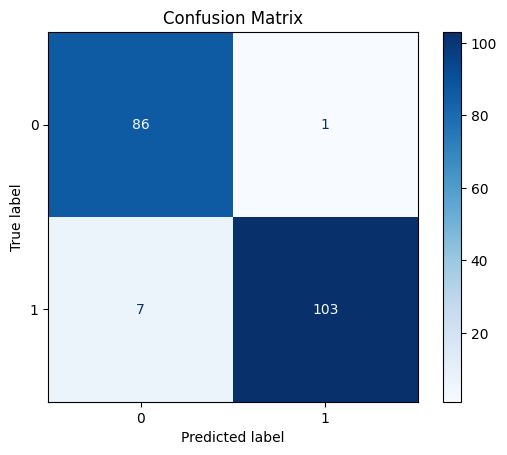

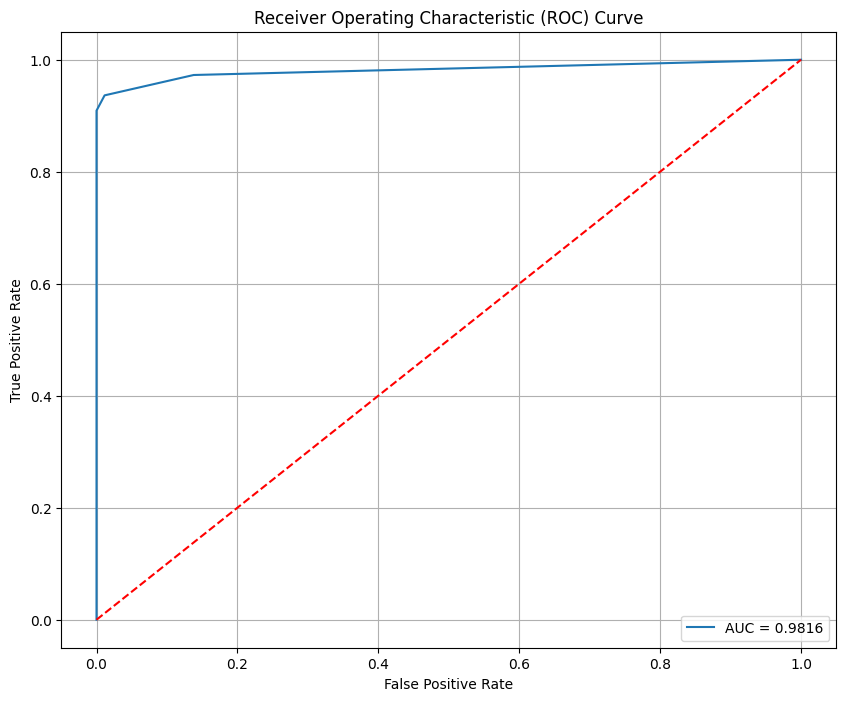

Training Accuracy: 0.9568
Validation Accuracy: 0.9594
Precision: 0.9904
Recall: 0.9364
F1-Score: 0.9626
Training Loss: 0.0846
Validation Loss: 0.6056
AUC-ROC: 0.9816


In [249]:
display_results(knn,'KNN')


# Logistic Regression

max_iters: 1 - Accuracy: 0.8528
max_iters: 2 - Accuracy: 0.8731
max_iters: 3 - Accuracy: 0.9391
max_iters: 4 - Accuracy: 0.9594
max_iters: 5 - Accuracy: 0.9543
max_iters: 6 - Accuracy: 0.9543
max_iters: 7 - Accuracy: 0.9543
max_iters: 8 - Accuracy: 0.9543
max_iters: 9 - Accuracy: 0.9543

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


max_iters: 10 - Accuracy: 0.9492
max_iters: 11 - Accuracy: 0.9492
max_iters: 12 - Accuracy: 0.9492
max_iters: 13 - Accuracy: 0.9543
max_iters: 14 - Accuracy: 0.9543
max_iters: 15 - Accuracy: 0.9543
max_iters: 16 - Accuracy: 0.9543


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 17 - Accuracy: 0.9543
max_iters: 18 - Accuracy: 0.9492
max_iters: 19 - Accuracy: 0.9492
max_iters: 20 - Accuracy: 0.9492
max_iters: 21 - Accuracy: 0.9492
max_iters: 22 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 23 - Accuracy: 0.9492
max_iters: 24 - Accuracy: 0.9492
max_iters: 25 - Accuracy: 0.9492
max_iters: 26 - Accuracy: 0.9492
max_iters: 27 - Accuracy: 0.9492
max_iters: 28 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 29 - Accuracy: 0.9492
max_iters: 30 - Accuracy: 0.9492
max_iters: 31 - Accuracy: 0.9492
max_iters: 32 - Accuracy: 0.9492
max_iters: 33 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 34 - Accuracy: 0.9492
max_iters: 35 - Accuracy: 0.9492
max_iters: 36 - Accuracy: 0.9492
max_iters: 37 - Accuracy: 0.9492
max_iters: 38 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 39 - Accuracy: 0.9492
max_iters: 40 - Accuracy: 0.9492
max_iters: 41 - Accuracy: 0.9492
max_iters: 42 - Accuracy: 0.9492
max_iters: 43 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

max_iters: 44 - Accuracy: 0.9492
max_iters: 45 - Accuracy: 0.9492
max_iters: 46 - Accuracy: 0.9492
max_iters: 47 - Accuracy: 0.9492


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_iters: 48 - Accuracy: 0.9492
max_iters: 49 - Accuracy: 0.9492
max_iters: 50 - Accuracy: 0.9492
max_iters: 51 - Accuracy: 0.9492
max_iters: 52 - Accuracy: 0.9492
max_iters: 53 - Accuracy: 0.9492
max_iters: 54 - Accuracy: 0.9492
max_iters: 55 - Accuracy: 0.9492
max_iters: 56 - Accuracy: 0.9492
max_iters: 57 - Accuracy: 0.9492
max_iters: 58 - Accuracy: 0.9492
max_iters: 59 - Accuracy: 0.9492
max_iters: 60 - Accuracy: 0.9492
max_iters: 61 - Accuracy: 0.9492
max_iters: 62 - Accuracy: 0.9492
max_iters: 63 - Accuracy: 0.9492
max_iters: 64 - Accuracy: 0.9492
max_iters: 65 - Accuracy: 0.9492
max_iters: 66 - Accuracy: 0.9492
max_iters: 67 - Accuracy: 0.9492
max_iters: 68 - Accuracy: 0.9492
max_iters: 69 - Accuracy: 0.9492
max_iters: 70 - Accuracy: 0.9492
max_iters: 71 - Accuracy: 0.9492
max_iters: 72 - Accuracy: 0.9492
max_iters: 73 - Accuracy: 0.9492
max_iters: 74 - Accuracy: 0.9492
max_iters: 75 - Accuracy: 0.9492
max_iters: 76 - Accuracy: 0.9492
max_iters: 77 - Accuracy: 0.9492
max_iters:

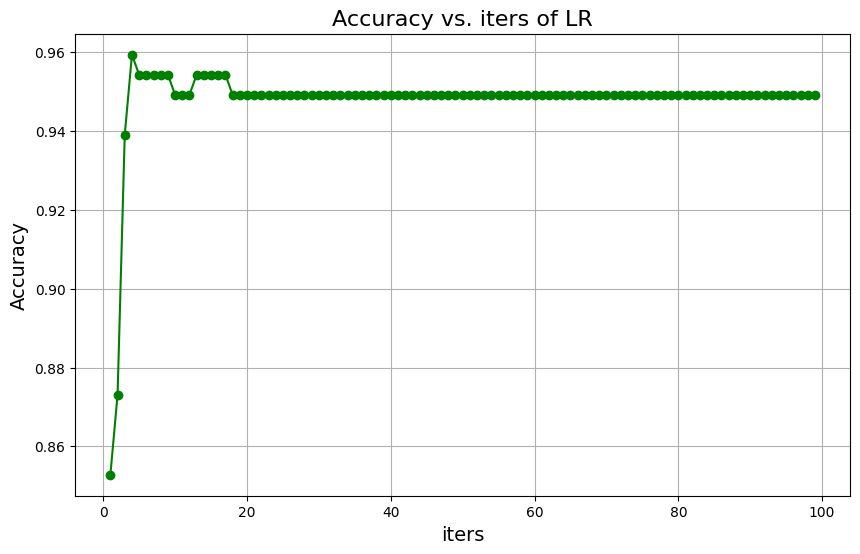

In [250]:
from sklearn.linear_model import LogisticRegression
iters_range = range(1, 100)
accuracies = []

for iters in iters_range:
  model = LogisticRegression(max_iter=iters, random_state=42, verbose= 1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"max_iters: {iters} - Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(iters_range, accuracies, marker='o', color='g')
plt.title('Accuracy vs. iters of LR', fontsize=16)
plt.xlabel('iters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [251]:
model = LogisticRegression(max_iter=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9593908629441624


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.97      0.95      0.96       110

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



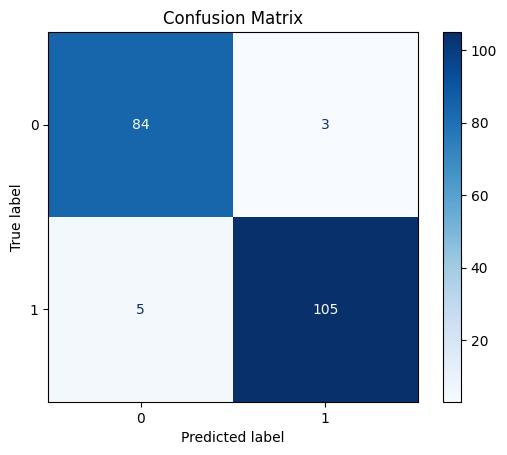

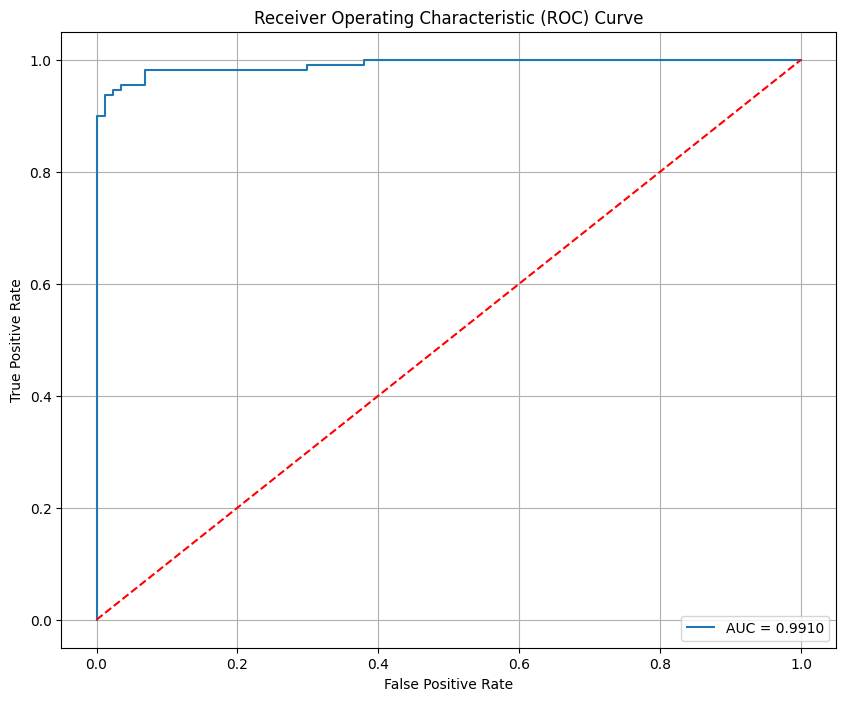

Training Accuracy: 0.9276
Validation Accuracy: 0.9594
Precision: 0.9722
Recall: 0.9545
F1-Score: 0.9633
Training Loss: 0.2319
Validation Loss: 0.1635
AUC-ROC: 0.9910


In [252]:
LR = model
display_results(LR,"LR")

# Random forest

1 - 0.9289340101522843
2 - 0.9187817258883249
3 - 0.9441624365482234
4 - 0.949238578680203
5 - 0.9441624365482234
6 - 0.949238578680203
7 - 0.949238578680203
8 - 0.9390862944162437
9 - 0.9390862944162437
10 - 0.9390862944162437
11 - 0.9441624365482234
12 - 0.949238578680203
13 - 0.949238578680203
14 - 0.9543147208121827
15 - 0.9543147208121827
16 - 0.949238578680203
17 - 0.949238578680203
18 - 0.9543147208121827
19 - 0.9441624365482234
20 - 0.949238578680203
21 - 0.9441624365482234
22 - 0.9543147208121827
23 - 0.9441624365482234
24 - 0.949238578680203
25 - 0.9441624365482234
26 - 0.949238578680203
27 - 0.949238578680203
28 - 0.949238578680203
29 - 0.949238578680203
30 - 0.949238578680203
31 - 0.949238578680203
32 - 0.949238578680203
33 - 0.9441624365482234
34 - 0.949238578680203
35 - 0.9441624365482234
36 - 0.9441624365482234
37 - 0.9441624365482234
38 - 0.949238578680203
39 - 0.949238578680203
40 - 0.949238578680203
41 - 0.949238578680203
42 - 0.949238578680203
43 - 0.949238578680203


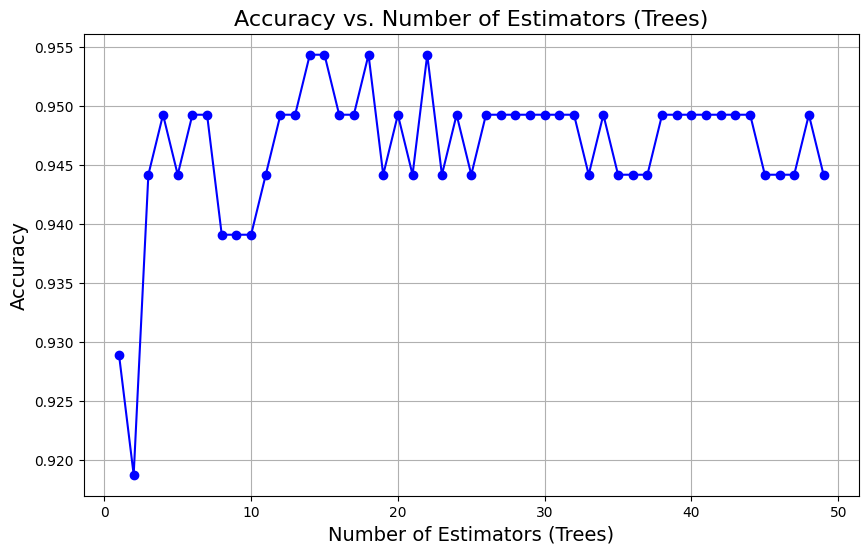

The optimal number of estimators (trees) is: 14


In [253]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_range = range(1, 50)
accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators,random_state=93)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(n_estimators, "-",accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', color='b')
plt.title('Accuracy vs. Number of Estimators (Trees)', fontsize=16)
plt.xlabel('Number of Estimators (Trees)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

optimal_n_estimators = n_estimators_range[accuracies.index(max(accuracies))]
print(f"The optimal number of estimators (trees) is: {optimal_n_estimators}")

In [254]:
rf = RandomForestClassifier(n_estimators=14, random_state=93)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9543147208121827


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.98      0.94      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



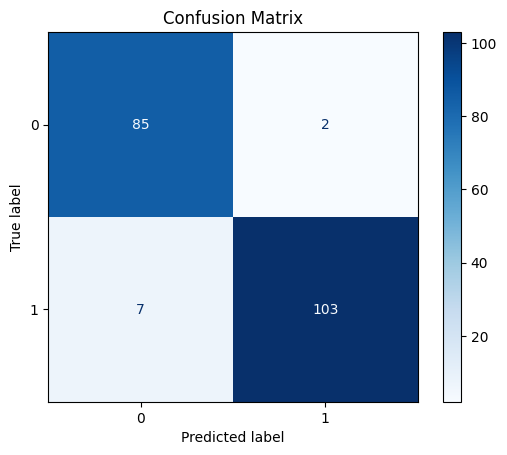

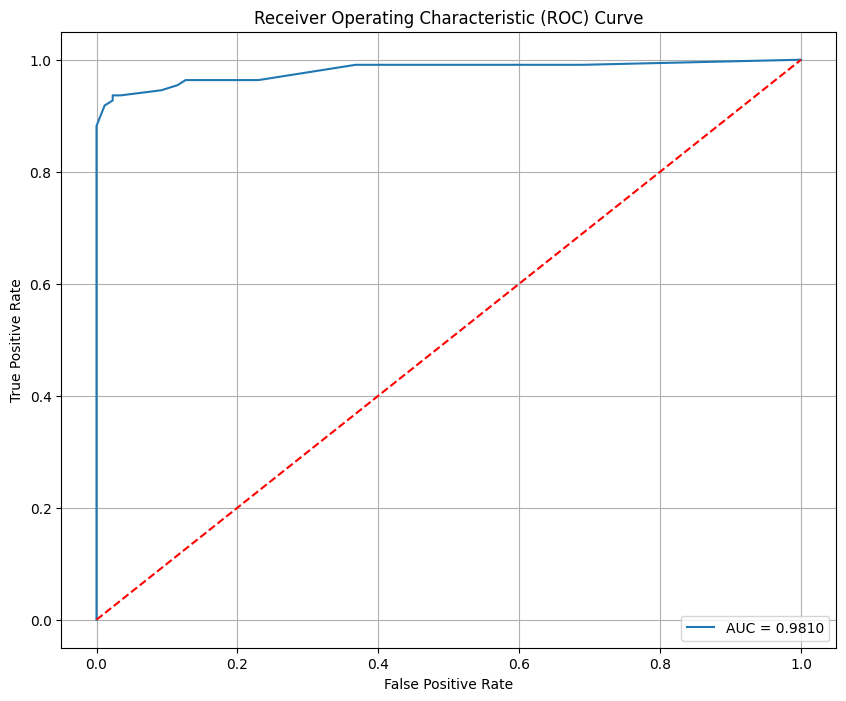

Training Accuracy: 0.9949
Validation Accuracy: 0.9543
Precision: 0.9810
Recall: 0.9364
F1-Score: 0.9581
Training Loss: 0.0506
Validation Loss: 0.3158
AUC-ROC: 0.9810


In [255]:
display_results(rf,"RF")

# Decision Tree

Max Depth: 1 - Accuracy: 0.9289
Max Depth: 2 - Accuracy: 0.9340
Max Depth: 3 - Accuracy: 0.9492
Max Depth: 4 - Accuracy: 0.9442
Max Depth: 5 - Accuracy: 0.9442
Max Depth: 6 - Accuracy: 0.9340
Max Depth: 7 - Accuracy: 0.9289
Max Depth: 8 - Accuracy: 0.9239
Max Depth: 9 - Accuracy: 0.9137
Max Depth: 10 - Accuracy: 0.9137
Max Depth: 11 - Accuracy: 0.9086
Max Depth: 12 - Accuracy: 0.9137
Max Depth: 13 - Accuracy: 0.9137
Max Depth: 14 - Accuracy: 0.9137
Max Depth: 15 - Accuracy: 0.9137
Max Depth: 16 - Accuracy: 0.9137
Max Depth: 17 - Accuracy: 0.9137
Max Depth: 18 - Accuracy: 0.9137
Max Depth: 19 - Accuracy: 0.9137
Max Depth: 20 - Accuracy: 0.9137
Max Depth: 21 - Accuracy: 0.9137
Max Depth: 22 - Accuracy: 0.9137
Max Depth: 23 - Accuracy: 0.9137
Max Depth: 24 - Accuracy: 0.9137
Max Depth: 25 - Accuracy: 0.9137
Max Depth: 26 - Accuracy: 0.9137
Max Depth: 27 - Accuracy: 0.9137
Max Depth: 28 - Accuracy: 0.9137
Max Depth: 29 - Accuracy: 0.9137
Max Depth: 30 - Accuracy: 0.9137
Max Depth: 31 - Acc

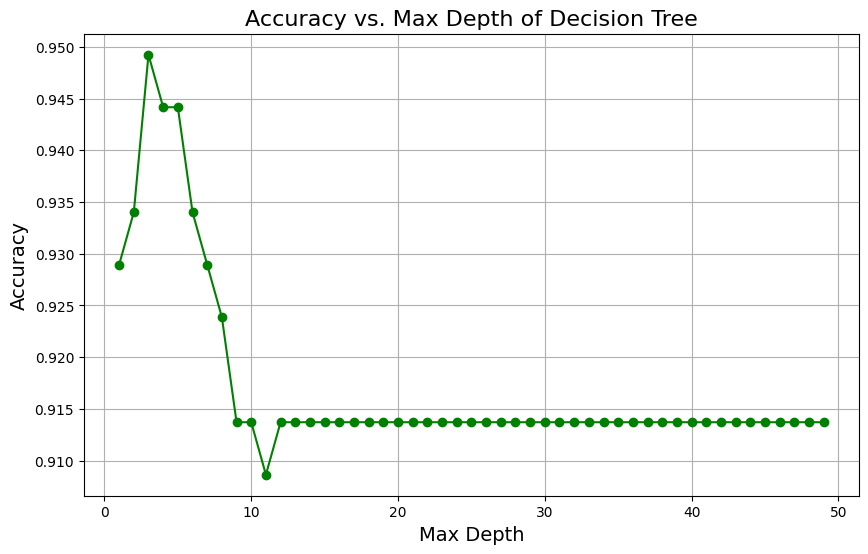

The optimal max depth is: 3


In [256]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_range = range(1, 50)
accuracies = []

for max_depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Max Depth: {max_depth} - Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracies, marker='o', color='g')
plt.title('Accuracy vs. Max Depth of Decision Tree', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()


optimal_max_depth = max_depth_range[accuracies.index(max(accuracies))]
print(f"The optimal max depth is: {optimal_max_depth}")

In [257]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_val_pred = dt_model.predict(X_test)
print(accuracy_score(y_test,y_val_pred))

0.949238578680203


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.97      0.94      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



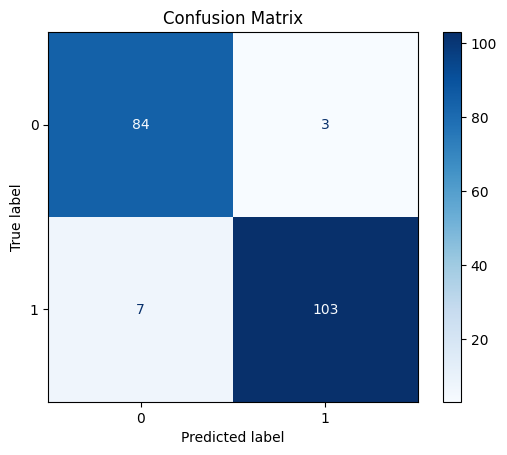

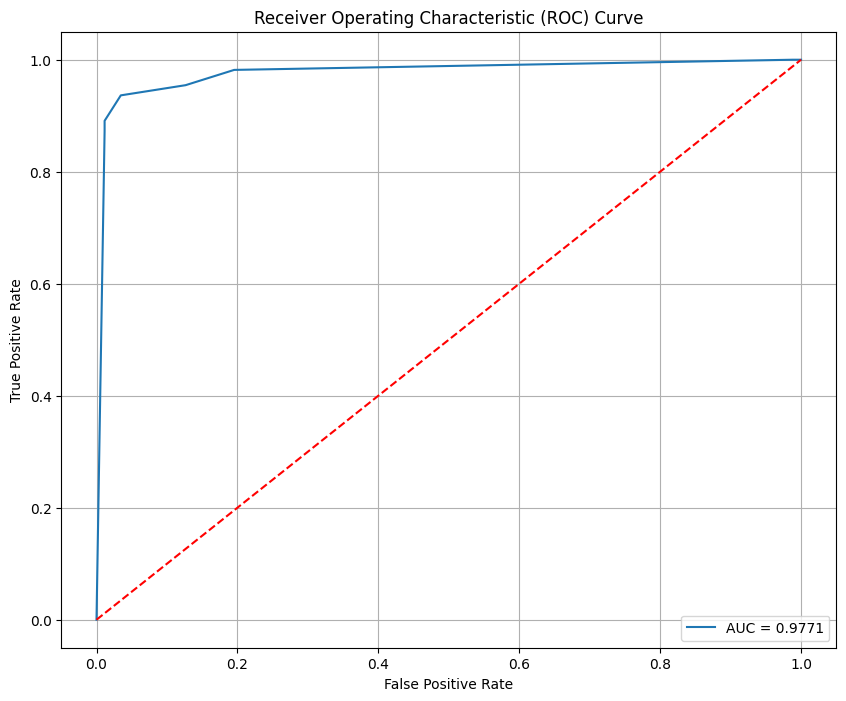

Training Accuracy: 0.9352
Validation Accuracy: 0.9492
Precision: 0.9717
Recall: 0.9364
F1-Score: 0.9537
Training Loss: 0.1808
Validation Loss: 0.3108
AUC-ROC: 0.9771


In [258]:
display_results(dt_model,"DT")

# SVM

In [259]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9543147208121827


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.93      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



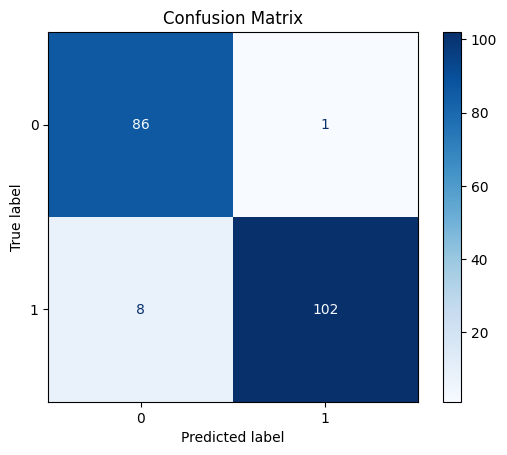

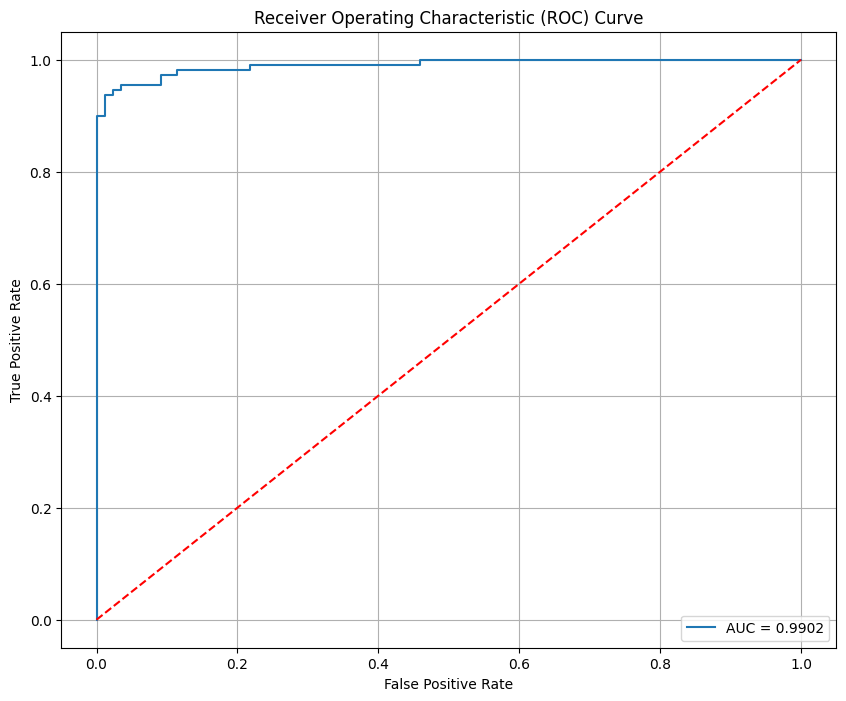

Training Accuracy: 0.9365
Validation Accuracy: 0.9543
Precision: 0.9903
Recall: 0.9273
F1-Score: 0.9577
Training Loss: 0.1479
Validation Loss: 0.1222
AUC-ROC: 0.9902


In [260]:
display_results(svm,"SVM")

# Naive-Bayes

Var Smoothing: 1.0e-50 - Accuracy: 0.9239
Var Smoothing: 1.0e-49 - Accuracy: 0.9239
Var Smoothing: 1.0e-48 - Accuracy: 0.9239
Var Smoothing: 1.0e-47 - Accuracy: 0.9239
Var Smoothing: 1.0e-46 - Accuracy: 0.9239
Var Smoothing: 1.0e-45 - Accuracy: 0.9239
Var Smoothing: 1.0e-44 - Accuracy: 0.9239
Var Smoothing: 1.0e-43 - Accuracy: 0.9239
Var Smoothing: 1.0e-42 - Accuracy: 0.9239
Var Smoothing: 1.0e-41 - Accuracy: 0.9239
Var Smoothing: 1.0e-40 - Accuracy: 0.9239
Var Smoothing: 1.0e-39 - Accuracy: 0.9239
Var Smoothing: 1.0e-38 - Accuracy: 0.9239
Var Smoothing: 1.0e-37 - Accuracy: 0.9239
Var Smoothing: 1.0e-36 - Accuracy: 0.9239
Var Smoothing: 1.0e-35 - Accuracy: 0.9239
Var Smoothing: 1.0e-34 - Accuracy: 0.9239
Var Smoothing: 1.0e-33 - Accuracy: 0.9239
Var Smoothing: 1.0e-32 - Accuracy: 0.9239
Var Smoothing: 1.0e-31 - Accuracy: 0.9239
Var Smoothing: 1.0e-30 - Accuracy: 0.9239
Var Smoothing: 1.0e-29 - Accuracy: 0.9239
Var Smoothing: 1.0e-28 - Accuracy: 0.9239
Var Smoothing: 1.0e-27 - Accuracy:

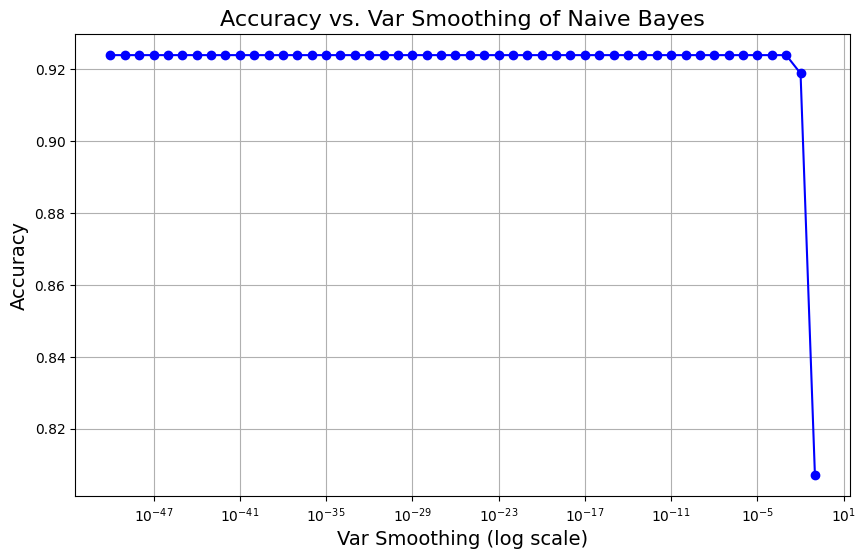

The optimal var smoothing is: 1.0e-50


In [261]:
from sklearn.naive_bayes import GaussianNB

var_smoothing_range = np.logspace(-50, -1, 50)
accuracies = []
for var_smoothing in var_smoothing_range:
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Var Smoothing: {var_smoothing:.1e} - Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_range, accuracies, marker='o', color='b')
plt.xscale('log')
plt.title('Accuracy vs. Var Smoothing of Naive Bayes', fontsize=16)
plt.xlabel('Var Smoothing (log scale)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

optimal_var_smoothing = var_smoothing_range[np.argmax(accuracies)]
print(f"The optimal var smoothing is: {optimal_var_smoothing:.1e}")

In [262]:
nb_model = GaussianNB(var_smoothing = 1.0e-50)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9238578680203046


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.98      0.88      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



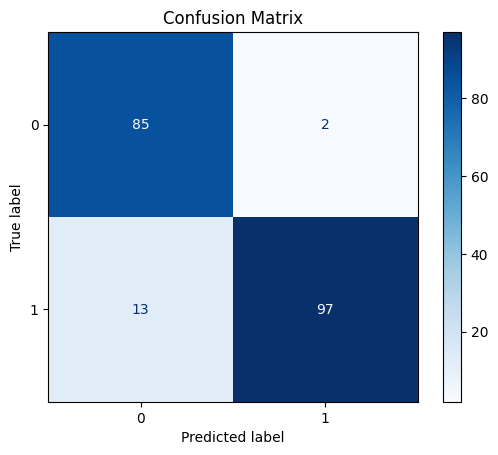

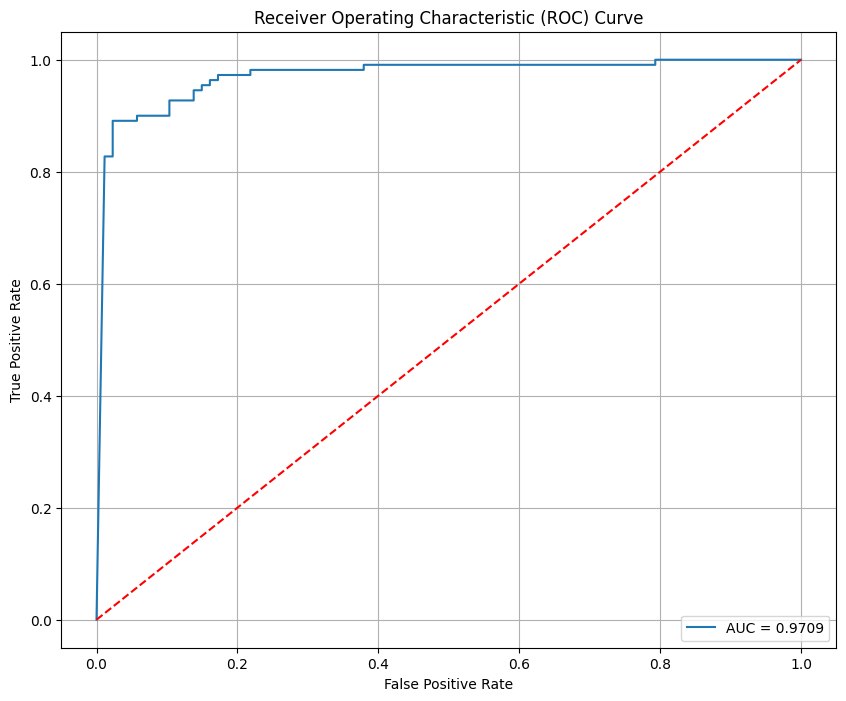

Training Accuracy: 0.9187
Validation Accuracy: 0.9239
Precision: 0.9798
Recall: 0.8818
F1-Score: 0.9282
Training Loss: 2.1342
Validation Loss: 1.8403
AUC-ROC: 0.9709


In [263]:
display_results(nb_model,"NB")

In [264]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)

def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_best]


styled_results_df = results_df.style.apply(highlight_best, subset=['Training Accuracy', 'Validation Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Loss', 'Validation Loss', 'AUC-ROC'])

# Display the styled Data
styled_results_df

,Model,Training Accuracy,Validation Accuracy,Precision,Recall,F1-Score,Training Loss,Validation Loss,AUC-ROC
0,KNN,0.956798,0.959391,0.990385,0.936364,0.962617,0.084557,0.605586,0.981609
1,LR,0.927573,0.959391,0.972222,0.954545,0.963303,0.231934,0.163495,0.991014
2,RF,0.994917,0.954315,0.980952,0.936364,0.958140,0.050555,0.315768,0.980982
4,SVM,0.936468,0.954315,0.990291,0.927273,0.957746,0.147890,0.122216,0.990178
3,DT,0.935197,0.949239,0.971698,0.936364,0.953704,0.180812,0.310814,0.977116
5,NB,0.918679,0.923858,0.979798,0.881818,0.928230,2.134157,1.840310,0.970899


# Stacked Ensemble





In [265]:
import itertools
from sklearn.ensemble import StackingClassifier


all_base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('naive_bayes', GaussianNB(var_smoothing=1.0e-04)),
    ('KNN', KNeighborsClassifier(n_neighbors=1)),
    ('SVC', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)),
    ('RF',RandomForestClassifier(n_estimators=14, random_state=93)),
    ('LR', LogisticRegression(max_iter=4, random_state=42))

]

meta_model = LogisticRegression(random_state=42, max_iter=600)

stacked_results = {
    'Model': [],
    'Accuracy': []
}

for r in range(2, len(all_base_models) + 1):
    for combination in itertools.combinations(all_base_models, r):
        stacking_model = StackingClassifier(estimators=list(combination), final_estimator=meta_model, cv=3, n_jobs=-1)
        stacking_model.fit(X_train, y_train)
        y_pred = stacking_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Append results to the stacked_results dictionary
        stacked_results['Model'].append(", ".join([name for name, _ in combination]))  # Join model names
        stacked_results['Accuracy'].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(stacked_results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

                                           Model  Accuracy
11                                       KNN, LR  0.964467
27                          naive_bayes, KNN, LR  0.964467
47                      naive_bayes, KNN, RF, LR  0.964467
28                          naive_bayes, SVC, RF  0.959391
26                          naive_bayes, KNN, RF  0.959391
25                         naive_bayes, KNN, SVC  0.959391
39           decision_tree, naive_bayes, SVC, LR  0.959391
21                        decision_tree, KNN, LR  0.959391
20                        decision_tree, KNN, RF  0.959391
16               decision_tree, naive_bayes, SVC  0.959391
46                     naive_bayes, KNN, SVC, LR  0.959391
43                    decision_tree, KNN, RF, LR  0.959391
10                                       KNN, RF  0.959391
33                                   KNN, RF, LR  0.959391
45                     naive_bayes, KNN, SVC, RF  0.954315
38           decision_tree, naive_bayes, SVC, RF  0.9543

In [266]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

base_models = [
    # ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('naive_bayes', GaussianNB(var_smoothing=1.0e-04)),
    ('KNN', KNeighborsClassifier(n_neighbors=1)),
    # ('SVC', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)),
    # ('RF',RandomForestClassifier(n_estimators=14, random_state=93)),
    ('LR', LogisticRegression(max_iter=4, random_state=42))
]

meta_model = LogisticRegression(random_state=42, max_iter=600)
# meta_model = SVC(random_state=42)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3, n_jobs=-1)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}\n")

Stacking Ensemble Accuracy: 0.9645



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        87
           1       0.99      0.95      0.97       110

    accuracy                           0.96       197
   macro avg       0.96      0.97      0.96       197
weighted avg       0.97      0.96      0.96       197



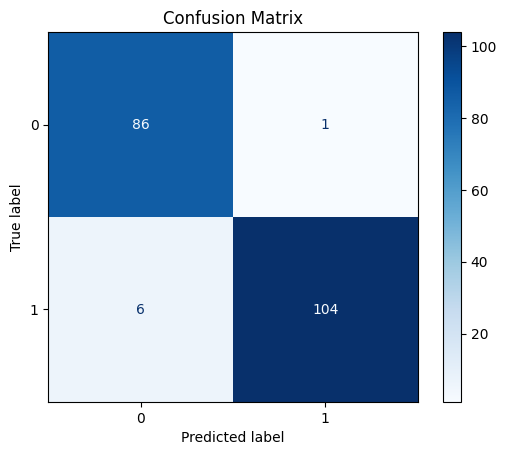

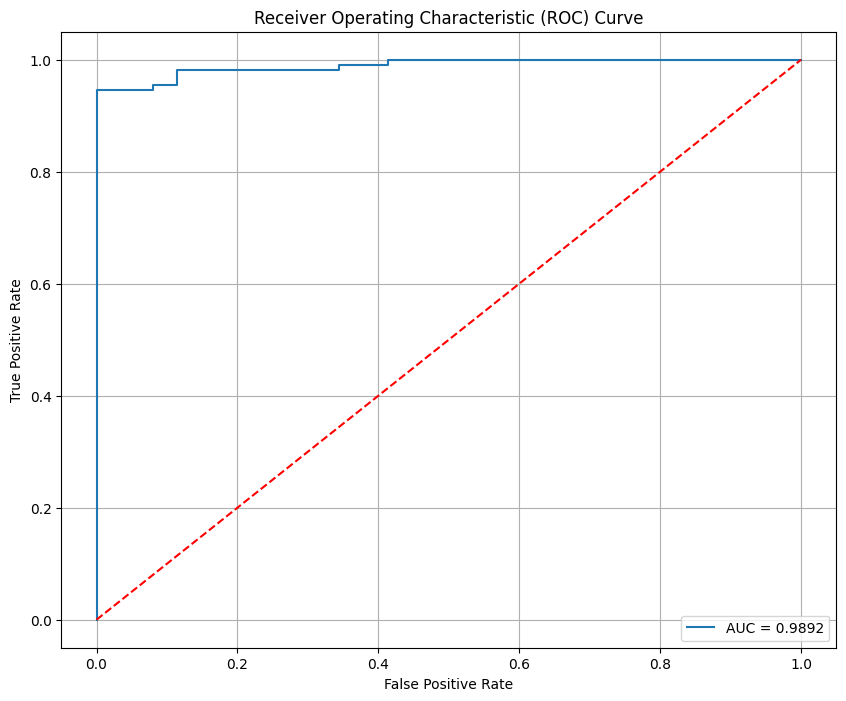

Training Accuracy: 0.9492
Validation Accuracy: 0.9645
Precision: 0.9905
Recall: 0.9455
F1-Score: 0.9674
Training Loss: 0.1137
Validation Loss: 0.1416
AUC-ROC: 0.9892


In [267]:
display_results(stacking_model,"STACKED")

In [268]:
results_df = pd.DataFrame(results)


results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)

def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_best]

def highlight_best_loss(s):
    is_best = s == s.min()
    return ['background-color: limegreen' if v else '' for v in is_best]

styled_results_df = results_df.style.apply(highlight_best, subset=['Training Accuracy', 'Validation Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']).apply(highlight_best_loss, subset=['Training Loss', 'Validation Loss'])
styled_results_df

,Model,Training Accuracy,Validation Accuracy,Precision,Recall,F1-Score,Training Loss,Validation Loss,AUC-ROC
6,STACKED,0.949174,0.964467,0.990476,0.945455,0.967442,0.113674,0.141614,0.989237
0,KNN,0.956798,0.959391,0.990385,0.936364,0.962617,0.084557,0.605586,0.981609
1,LR,0.927573,0.959391,0.972222,0.954545,0.963303,0.231934,0.163495,0.991014
2,RF,0.994917,0.954315,0.980952,0.936364,0.958140,0.050555,0.315768,0.980982
4,SVM,0.936468,0.954315,0.990291,0.927273,0.957746,0.147890,0.122216,0.990178
3,DT,0.935197,0.949239,0.971698,0.936364,0.953704,0.180812,0.310814,0.977116
5,NB,0.918679,0.923858,0.979798,0.881818,0.928230,2.134157,1.840310,0.970899
